## 1. Perkenalan

DS=Suma Bimantoro Andru

## 2.- Import Libraries

In [43]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

## 3 - Data Loading

In [44]:
#import data train
data1=pd.read_csv('Train-1542865627584.csv') #label #done
data2=pd.read_csv('Train_Beneficiarydata-1542865627584.csv')
data3=pd.read_csv('Train_Inpatientdata-1542865627584.csv')
data4=pd.read_csv('Train_Outpatientdata-1542865627584.csv')

In [45]:
#import data test
datates1=pd.read_csv('Test-1542969243754.csv') 
datates2=pd.read_csv('Test_Beneficiarydata-1542969243754.csv')
datates3=pd.read_csv('Test_Inpatientdata-1542969243754.csv')
datates4=pd.read_csv('Test_Outpatientdata-1542969243754.csv')

## EDA


In [46]:
# https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-bars-in-seaborn
def percentage_with_hue(plot, feature, Number_of_categories, hue_categories, x_pos=0, y_pos=0, fontsize = 12):
    '''
    This function prints percentage of a barplot when plotted with hue.
    '''
    # get the height of each bar
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            # calculate percentage of the category
            percentage = '{:.2f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            # set the x and y position of the percentage value to look good
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 + x_pos
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() + y_pos
            ax.annotate(percentage, (x, y), fontsize = fontsize)
    plt.show()
    
def percentage_without_hue(ax, feature, x_pos=0, y_pos=0, fontsize = 12 ):
    '''
    This function prints percentage of a barplot when plotted without hue.
    '''
    total = len(feature)
    for p in ax.patches:
        # calculate percentage of the category
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2 + x_pos # To adjust the position of the percentage value
        y = p.get_y() + p.get_height() + y_pos # To adjust the position of the percentage value
        ax.annotate(percentage, (x, y),ha='center', size = fontsize)
    plt.show()

### Analyze Train/Test Data (Class labels)

In [47]:
data1.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


Peneliti merencanakan plot di bawah ini untuk memeriksa distribusi label kelas.

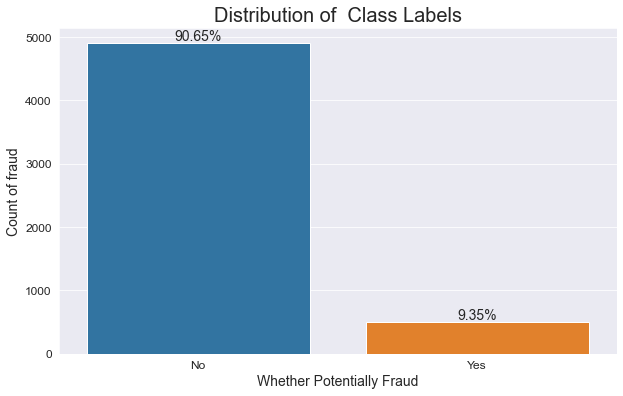

In [49]:
# Check distribution of potential Fraudulent providers
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
ax = sns.countplot(x='PotentialFraud',data=data1)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.title('Distribution of  Class Labels', fontsize=20)
plt.xlabel('Whether Potentially Fraud', size = 14)
plt.ylabel('Count of fraud', size = 14)
percentage_without_hue(ax, data1['PotentialFraud'], 0,40,14)

Terlihat dataset `unbalance dimana 9.35% pontensial Fraud dan 90.65% tidak Fraud`

### Analyze Train_Beneficiary/Test_Beneficiary Data

In [50]:
# display all the columns in a dataframe
pd.set_option('display.max_columns', None)

In [54]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

In [51]:
data2.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,2,2,2,2,1,2,1,2,2,2,2,0,0,1790,1200


In [53]:
# Replacing 2 with 0 for chronic conditions, Zero indicates chronic condition is No

data2 = data2.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)

# For RenalDiseaseIndicator replacing 'Y' with 1
data2 = data2.replace({'RenalDiseaseIndicator': 'Y'}, 1)

datates2 = datates2.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)

datates2 = datates2.replace({'RenalDiseaseIndicator': 'Y'}, 1)

Peneliti merubah chronic conditions dari 2 ke 0, yang artinnya 0 adalah tidak

In [55]:
# convert all these columns datatypes to numeric
data2[["ChronicCond_Alzheimer", "ChronicCond_Heartfailure", "ChronicCond_KidneyDisease", "ChronicCond_Cancer", "ChronicCond_ObstrPulmonary", "ChronicCond_Depression", "ChronicCond_Diabetes", "ChronicCond_IschemicHeart", "ChronicCond_Osteoporasis", "ChronicCond_rheumatoidarthritis", "ChronicCond_stroke", "RenalDiseaseIndicator"]] = data2[["ChronicCond_Alzheimer", "ChronicCond_Heartfailure", "ChronicCond_KidneyDisease", "ChronicCond_Cancer", "ChronicCond_ObstrPulmonary", "ChronicCond_Depression", "ChronicCond_Diabetes", "ChronicCond_IschemicHeart", "ChronicCond_Osteoporasis", "ChronicCond_rheumatoidarthritis", "ChronicCond_stroke", "RenalDiseaseIndicator"]].apply(pd.to_numeric)

# convert all these columns datatypes to numeric
datates2[["ChronicCond_Alzheimer", "ChronicCond_Heartfailure", "ChronicCond_KidneyDisease", "ChronicCond_Cancer", "ChronicCond_ObstrPulmonary", "ChronicCond_Depression", "ChronicCond_Diabetes", "ChronicCond_IschemicHeart", "ChronicCond_Osteoporasis", "ChronicCond_rheumatoidarthritis", "ChronicCond_stroke", "RenalDiseaseIndicator"]] = datates2[["ChronicCond_Alzheimer", "ChronicCond_Heartfailure", "ChronicCond_KidneyDisease", "ChronicCond_Cancer", "ChronicCond_ObstrPulmonary", "ChronicCond_Depression", "ChronicCond_Diabetes", "ChronicCond_IschemicHeart", "ChronicCond_Osteoporasis", "ChronicCond_rheumatoidarthritis", "ChronicCond_stroke", "RenalDiseaseIndicator"]].apply(pd.to_numeric)



In [58]:
# Replacing '2' with '0' for Gender Type
data2 = data2.replace({'Gender': 2}, 0)

datates2 = datates2.replace({'Gender': 2}, 0)

`Plotting the distribution of Gender in Beneficiary Data. Plotted countplot of Gender.`

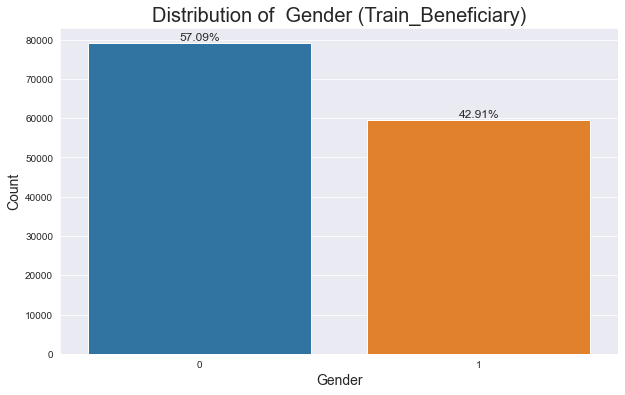

In [59]:
# Plot distribution of gender in Beneficiaries data
plt.figure(figsize=(10,6))
ax = sns.countplot(x='Gender',data=data2, order = data2['Gender'].value_counts().index)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.title('Distribution of  Gender (Train_Beneficiary)', fontsize=20)
plt.xlabel('Gender', size = 14)
plt.ylabel('Count', size = 14)
percentage_without_hue(ax, data2['Gender'], 0,800,12)

### Observation:
The ratio of genders in beneficiary data is Gender_0 : Gender1 = 57.09% : 42.91%.

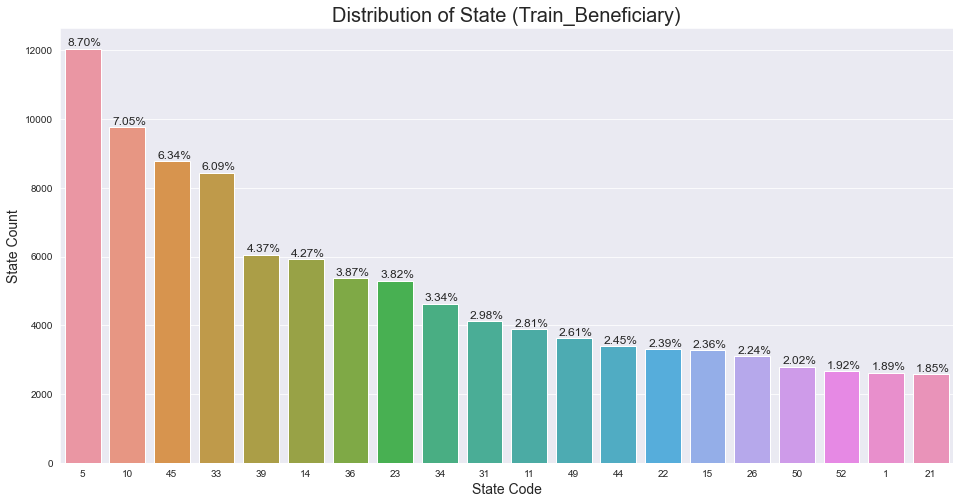

In [61]:
# Plot top 20 states from where the beneficiaries belong
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='State',y=None, data=data2, orient ="v", order = data2['State'].value_counts().head(20).index)
plt.title('Distribution of State (Train_Beneficiary)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('State Code', size = 14)
plt.ylabel('State Count', size = 14)
percentage_without_hue(ax, data2['State'], 0.05, 80,12)

### Observation:
1. Top 20 states in terms of beneficiary count are shown in the above pic.
2. States with code 5, 10, 45, 33 and 39 are the top 5 states.
3. 8.7% of the beneficiaries belongs to state 5

### Plotting top 20 Countries in terms of beneficiary count

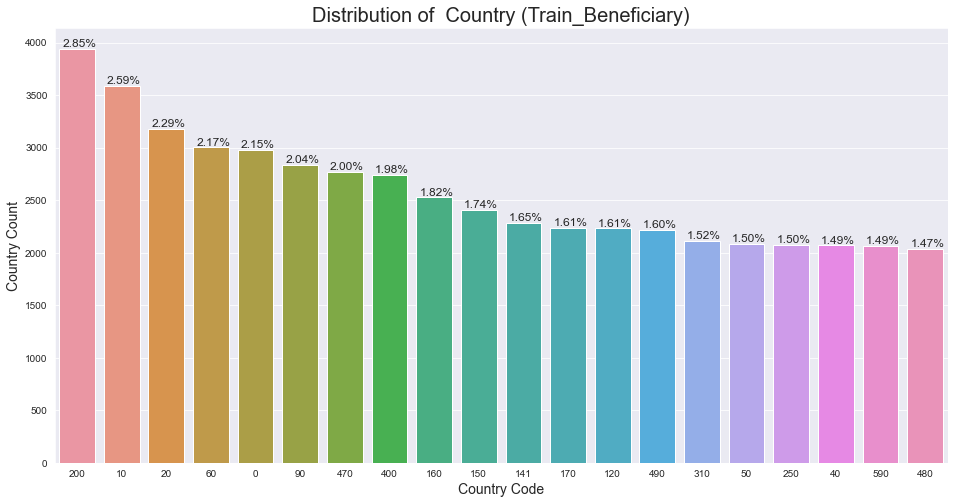

In [62]:
# Plot top 20 Country from where the beneficiaries belong
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='County',y=None, data=data2, orient ="v", order = data2['County'].value_counts().head(20).index)
plt.title('Distribution of  Country (Train_Beneficiary)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Country Code', size = 14)
plt.ylabel('Country Count', size = 14)
percentage_without_hue(ax, data2['County'], 0.05, 20,12)

### Observation:
1. Top 20 countries in terms of beneficiary count are shown in the above pic.
2. Countries with code 200, 10, 20, 60 and 0 are the top 5 states.
3. 2.85% of the beneficiaries belongs to country code 200.

### Plotting countplot of Race in the beneficiary data

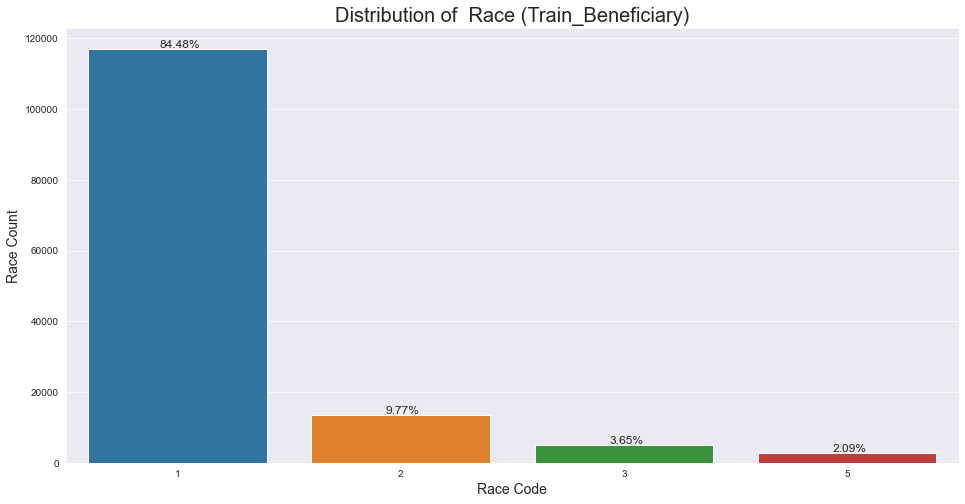

In [63]:
# Plot distribution of race in beneficiaries data
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='Race',y=None, data=data2, orient ="v", order = data2['Race'].value_counts().index)
plt.title('Distribution of  Race (Train_Beneficiary)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Race Code', size = 14)
plt.ylabel('Race Count', size = 14)
percentage_without_hue(ax, data2['Race'], 0.01, 200,12)

### Observation:
1. Race 1 is the most in terms of beneficiary count.
2. 85% beneficiaries belongs to race 1.
3. There is no race 4 in the dataset.

### Plot the countplot of NoOfMonths_PartACov for all beneficiaries

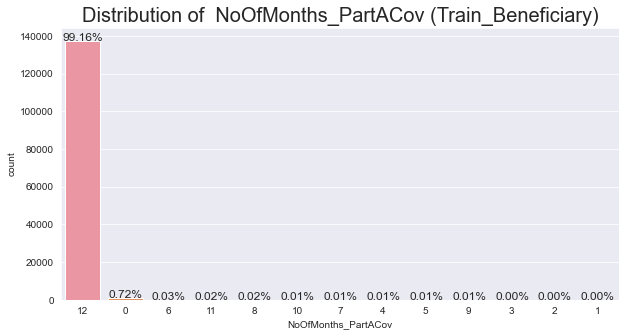

In [66]:
# Plot distribution of race in beneficiaries data
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='NoOfMonths_PartACov',y=None, data=data2, orient ="v", order = data2['NoOfMonths_PartACov'].value_counts().index)
plt.title('Distribution of  NoOfMonths_PartACov (Train_Beneficiary)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
# plt.xlabel('Race Code', size = 14)
# plt.ylabel('Race Count', size = 14)
percentage_without_hue(ax, data2['Race'], 0.01, 200,12)

### Observation:
1. 99% patients covered Part A for 12 months.

### Plot the countplot of NoOfMonths_PartBCov for all beneficiaries

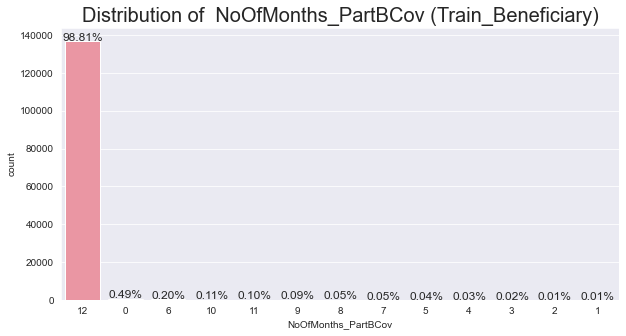

In [68]:
# Plot distribution of race in beneficiaries data
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='NoOfMonths_PartBCov',y=None, data=data2, orient ="v", order = data2['NoOfMonths_PartBCov'].value_counts().index)
plt.title('Distribution of  NoOfMonths_PartBCov (Train_Beneficiary)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
# plt.xlabel('Race Code', size = 14)
# plt.ylabel('Race Count', size = 14)
percentage_without_hue(ax, data2['Race'], 0.01, 200,12)

### Observation:
1. 98% patients covered Part B for 12 months.

### Plot Scatterplot OPAnnualDeductibleAmt vs OPAnnualReimbursementAmt

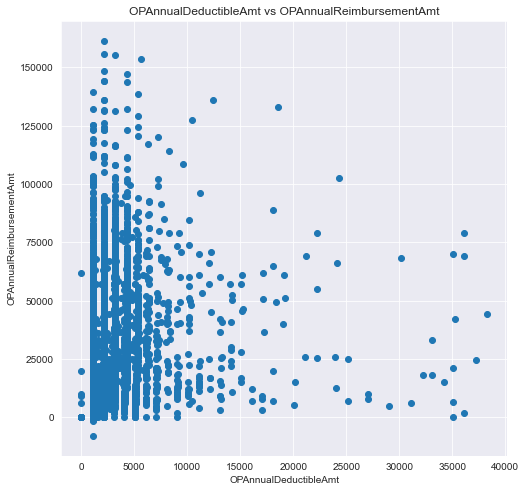

In [69]:
# Plot Scatterplot IPAnnualDeductibleAmt vs IPAnnualReimbursementAmt
plt.figure(figsize=(8, 8))
plt.scatter(data2.IPAnnualDeductibleAmt, data2.IPAnnualReimbursementAmt)
plt.xlabel('OPAnnualDeductibleAmt')
plt.ylabel('OPAnnualReimbursementAmt')
plt.title('OPAnnualDeductibleAmt vs OPAnnualReimbursementAmt')
plt.show()

### Observation:
OPAnnualDeductibleAmt indicated the amount paid by the beneficiary anually for outpatient claim and OPAnnualReimbursementAmt indicates the reimbursement amount the beneficiary is eligible for per annum.

1. For some of the patients even though the deductible amount is zero, reimbursement is very high.
2. For some of the patients deductible amount is very high but reimbursement amount zero or very low.
May be these data are wrong due to wrong entry

### Analyze Train_Inpatient/Test_Inpatient Data

In [76]:
data3.head(3)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


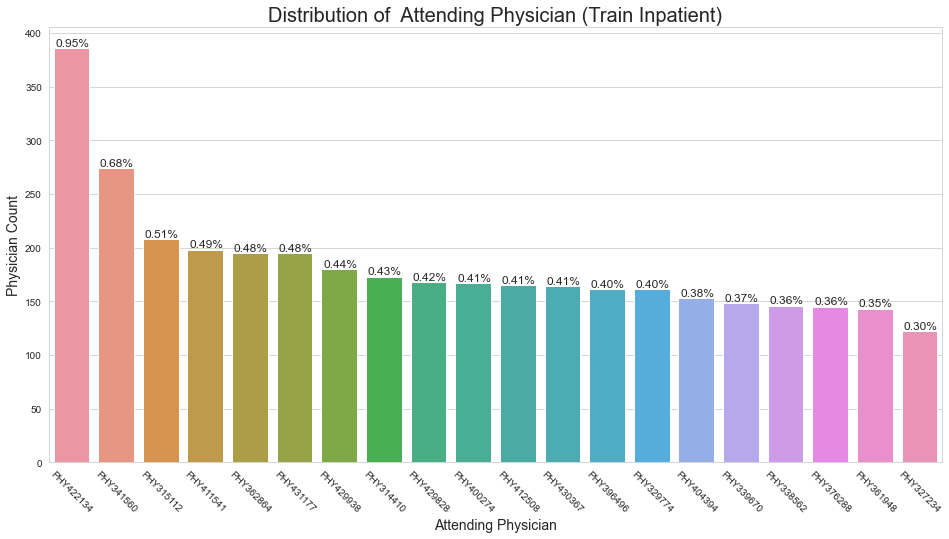

In [77]:
# Plot top 20 Attending Physician in terms of number of patients treated
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='AttendingPhysician',y=None, data=data3, orient ="v", order = data3['AttendingPhysician'].value_counts().iloc[:20].index)
plt.title('Distribution of  Attending Physician (Train Inpatient)', fontsize=20)
plt.xlabel('Attending Physician', size = 14)
plt.ylabel('Physician Count', size = 14)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, data3['AttendingPhysician'], 0.02, 2, 12)

### Observation:
1. PHY422134, PHY341560, PHY315112, PHY411541, PHY431177 are the top 5 attending physicians in terms of number of patients visit.
2. PHY422134 treated 1% of the total patients.

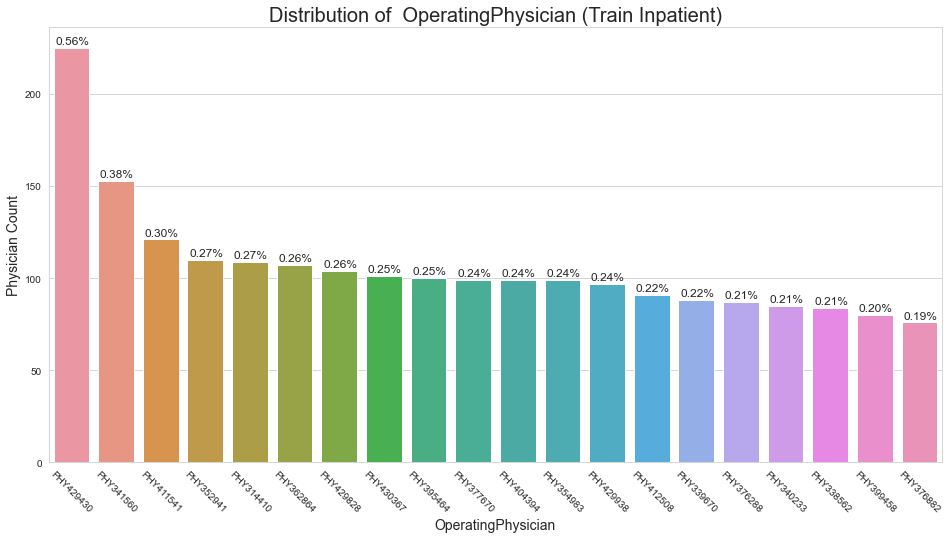

In [78]:
# Plot top 20 Operating Physician in terms of number of patients operated
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='OperatingPhysician',y=None, data=data3, orient ="v", order = data3['OperatingPhysician'].value_counts().iloc[:20].index)
plt.title('Distribution of  OperatingPhysician (Train Inpatient)', fontsize=20)
plt.xlabel('OperatingPhysician', size = 14)
plt.ylabel('Physician Count', size = 14)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, data3['OperatingPhysician'], 0.02, 2, 12)

### Observation:
1. PHY429430, PHY341560, PHY411541, PHY352941, PHY314410 are the top 5 operating physicians in terms of number of patients operation.
2. PHY429430 operated 0.56% of the total patients.

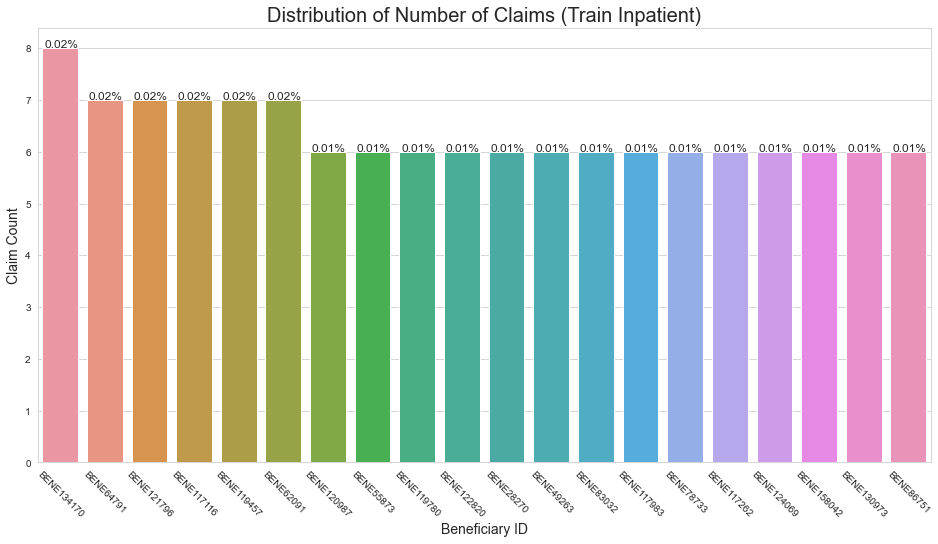

In [79]:
# Distribution of Number of Claims
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='BeneID',y=None, data=data3, orient ="v", order = data3['BeneID'].value_counts().head(20).index)
plt.title('Distribution of Number of Claims (Train Inpatient)', fontsize=20)
plt.xlabel('Beneficiary ID', size = 14)
plt.ylabel('Claim Count', size = 14)
plt.xticks(rotation=-45)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, data3['BeneID'], 0.02, 0.01, 12)

### Observation:
1. BENE134170 claimed maximum number of inpatient claims that is 8.
2. Another 5 beneficiaries claimed 7 claims, shown in the plot.

In [82]:
# convert ClaimStartDt, ClaimEndDt from string to datetime format
data3['ClaimStartDt'] = pd.to_datetime(data3['ClaimStartDt'] , format = '%Y-%m-%d')
data3['ClaimEndDt'] = pd.to_datetime(data3['ClaimEndDt'],format = '%Y-%m-%d')

datates3['ClaimStartDt'] = pd.to_datetime(datates3['ClaimStartDt'] , format = '%Y-%m-%d')
datates3['ClaimEndDt'] = pd.to_datetime(datates3['ClaimEndDt'],format = '%Y-%m-%d')

# convert AdmissionDt, DischargeDt from string to datetime format
data3['AdmissionDt'] = pd.to_datetime(data3['AdmissionDt'] , format = '%Y-%m-%d')
data3['DischargeDt'] = pd.to_datetime(data3['DischargeDt'],format = '%Y-%m-%d')

datates3['AdmissionDt'] = pd.to_datetime(datates3['AdmissionDt'] , format = '%Y-%m-%d')
datates3['DischargeDt'] = pd.to_datetime(datates3['DischargeDt'],format = '%Y-%m-%d')

In [83]:
# Calculate Hospitalization_Duration = DischargeDt - AdmissionDt
data3['Hospitalization_Duration'] = ((data3['DischargeDt'] - data3['AdmissionDt']).dt.days)+1
# Calculate Claim_Period = ClaimEndDt - ClaimStartDt
data3['Claim_Period'] = ((data3['ClaimEndDt'] - data3['ClaimStartDt']).dt.days)+1

datates3['Hospitalization_Duration'] = ((datates3['DischargeDt'] - datates3['AdmissionDt']).dt.days)+1
datates3['Claim_Period'] = ((datates3['ClaimEndDt'] - datates3['ClaimStartDt']).dt.days)+1

### If the number of days claimed for Inpatient treatment is more than no of days hospitalized is suscicious. So, I am adding this feature column.

In [85]:
# ExtraClaimDays = Claim_Period - Hospitalization_Duration
data3['ExtraClaimDays'] = np.where(data3['Claim_Period']>data3['Hospitalization_Duration'], data3['Claim_Period'] - data3['Hospitalization_Duration'], 0)
datates3['ExtraClaimDays'] = np.where(datates3['Claim_Period']>datates3['Hospitalization_Duration'], datates3['Claim_Period'] - datates3['Hospitalization_Duration'], 0)

In [86]:
# https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column
# Get the months and year of claim start and claim end
data3['ClaimStart_Year'] = data3['ClaimStartDt'].dt.year
data3['ClaimStart_Month'] = data3['ClaimStartDt'].dt.month
data3['ClaimStart_Year'] = data3['ClaimStartDt'].dt.year
data3['ClaimStart_Month'] = data3['ClaimStartDt'].dt.month

data3['ClaimEnd_Year'] = data3['ClaimEndDt'].dt.year
data3['ClaimEnd_Month'] = data3['ClaimEndDt'].dt.month
datates3['ClaimEnd_Year'] = datates3['ClaimEndDt'].dt.year
datates3['ClaimEnd_Month'] = datates3['ClaimEndDt'].dt.month

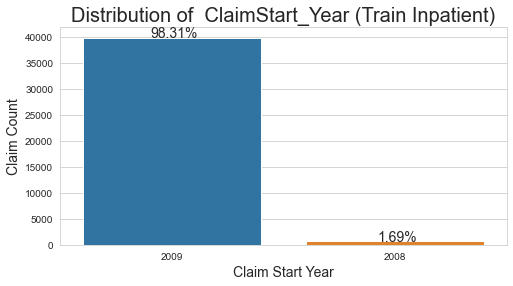

In [87]:
# Plot distribution of claim start year in Train Inpatient data
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='ClaimStart_Year',y=None, data=data3, orient ="v", order = data3['ClaimStart_Year'].value_counts().index)
plt.title('Distribution of  ClaimStart_Year (Train Inpatient)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Claim Start Year', size = 14)
plt.ylabel('Claim Count', size = 14)
percentage_without_hue(ax, data3['ClaimStart_Year'], 0.01, 20,14)

### Observation:
1. For 98.3% of the patients claim started in 2009.
2. Only 1.7 % claim started in 2008

## Feature Selection

In [4]:
#Pilih Feature yang berkorelasi dari Beneficiarydata
data2new=data2[['BeneID','Gender','RenalDiseaseIndicator','NoOfMonths_PartACov','NoOfMonths_PartBCov','ChronicCond_Alzheimer','ChronicCond_Heartfailure','ChronicCond_KidneyDisease','ChronicCond_Cancer','ChronicCond_ObstrPulmonary','ChronicCond_Depression','ChronicCond_Diabetes','ChronicCond_IschemicHeart','ChronicCond_Osteoporasis','ChronicCond_rheumatoidarthritis','ChronicCond_stroke','IPAnnualReimbursementAmt','IPAnnualDeductibleAmt','OPAnnualReimbursementAmt','OPAnnualDeductibleAmt']]
data2tesnew=datates2[['BeneID','Gender','RenalDiseaseIndicator','NoOfMonths_PartACov','NoOfMonths_PartBCov','ChronicCond_Alzheimer','ChronicCond_Heartfailure','ChronicCond_KidneyDisease','ChronicCond_Cancer','ChronicCond_ObstrPulmonary','ChronicCond_Depression','ChronicCond_Diabetes','ChronicCond_IschemicHeart','ChronicCond_Osteoporasis','ChronicCond_rheumatoidarthritis','ChronicCond_stroke','IPAnnualReimbursementAmt','IPAnnualDeductibleAmt','OPAnnualReimbursementAmt','OPAnnualDeductibleAmt']]

In [5]:
#Pilih Feature yang berkorelasi dari Inpatientdata
data3new=data3[['BeneID','Provider','InscClaimAmtReimbursed','DeductibleAmtPaid']]
data3tesnew=datates3[['BeneID','Provider','InscClaimAmtReimbursed','DeductibleAmtPaid']]

In [6]:
#Pilih Feature yang berkorelasi dari Outpatientdata
data4new=data4[['Provider','InscClaimAmtReimbursed','DeductibleAmtPaid']]
data4tesnew=datates4[['Provider','InscClaimAmtReimbursed','DeductibleAmtPaid']]

In [7]:
#merge 1 n 3 with Provider Foregn key
data1n3=pd.merge(data1,data3new,on='Provider',how='left')
datates1n3=pd.merge(datates1,data3tesnew,on='Provider',how='left')

In [8]:
#merge 1,3 and 2
data13n2=pd.merge(data2new,data1n3,on='BeneID',how='outer')
datates1n3=pd.merge(data2tesnew,datates1n3,on='BeneID',how='outer')

In [9]:
#merge 132 and 4
data132n4=pd.merge(data4new,data13n2,on='Provider',how='outer')
datatese132n4=pd.merge(data4tesnew,datates1n3,on='Provider',how='outer')

In [10]:
remove_columns=['BeneID']

final_train=data132n4.drop(columns=remove_columns, axis=1)
final_test=datatese132n4.drop(columns=remove_columns, axis=1)

In [11]:
final_train

,Provider,InscClaimAmtReimbursed_x,DeductibleAmtPaid_x,Gender,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,...,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,InscClaimAmtReimbursed_y,DeductibleAmtPaid_y
0,PRV56011,30.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN
1,PRV56011,40.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN
2,PRV56011,200.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN
3,PRV56011,20.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN
4,PRV56011,40.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11416113,PRV54054,NaN,NaN,2.0,Y,12.0,12.0,1.0,1.0,1.0,...,1.0,1.0,2.0,15000.0,2136.0,2810.0,560.0,No,5000.0,1068.0
11416114,PRV51136,NaN,NaN,1.0,0,12.0,12.0,2.0,2.0,2.0,...,2.0,2.0,2.0,20000.0,1068.0,400.0,220.0,No,20000.0,1068.0
11416115,PRV51977,NaN,NaN,1.0,Y,12.0,12.0,2.0,1.0,1.0,...,2.0,1.0,2.0,24420.0,3204.0,11670.0,3930.0,No,8000.0,1068.0
11416116,PRV55706,NaN,NaN,1.0,Y,12.0,12.0,1.0,1.0,1.0,...,2.0,1.0,1.0,20000.0,2136.0,740.0,320.0,No,12000.0,1068.0


In [12]:
final_train.shape

(11416118, 25)

In [13]:
final_test.shape

(2848907, 24)

## handling Missing Value

In [14]:
final_train.isnull().sum()

Provider                           107267
InscClaimAmtReimbursed_x           111014
DeductibleAmtPaid_x                111014
Gender                             298000
RenalDiseaseIndicator              298000
NoOfMonths_PartACov                298000
NoOfMonths_PartBCov                298000
ChronicCond_Alzheimer              298000
ChronicCond_Heartfailure           298000
ChronicCond_KidneyDisease          298000
ChronicCond_Cancer                 298000
ChronicCond_ObstrPulmonary         298000
ChronicCond_Depression             298000
ChronicCond_Diabetes               298000
ChronicCond_IschemicHeart          298000
ChronicCond_Osteoporasis           298000
ChronicCond_rheumatoidarthritis    298000
ChronicCond_stroke                 298000
IPAnnualReimbursementAmt           298000
IPAnnualDeductibleAmt              298000
OPAnnualReimbursementAmt           298000
OPAnnualDeductibleAmt              298000
PotentialFraud                     107267
InscClaimAmtReimbursed_y          

In [15]:
final_test.isnull().sum()

Provider                            55617
InscClaimAmtReimbursed_x            56463
DeductibleAmtPaid_x                 56463
Gender                              72822
RenalDiseaseIndicator               72822
NoOfMonths_PartACov                 72822
NoOfMonths_PartBCov                 72822
ChronicCond_Alzheimer               72822
ChronicCond_Heartfailure            72822
ChronicCond_KidneyDisease           72822
ChronicCond_Cancer                  72822
ChronicCond_ObstrPulmonary          72822
ChronicCond_Depression              72822
ChronicCond_Diabetes                72822
ChronicCond_IschemicHeart           72822
ChronicCond_Osteoporasis            72822
ChronicCond_rheumatoidarthritis     72822
ChronicCond_stroke                  72822
IPAnnualReimbursementAmt            72822
IPAnnualDeductibleAmt               72822
OPAnnualReimbursementAmt            72822
OPAnnualDeductibleAmt               72822
InscClaimAmtReimbursed_y           128439
DeductibleAmtPaid_y               

In [16]:
final_train.dropna(inplace=True)

In [17]:
final_test.dropna(inplace=True)

In [18]:
final_train.isnull().sum()

Provider                           0
InscClaimAmtReimbursed_x           0
DeductibleAmtPaid_x                0
Gender                             0
RenalDiseaseIndicator              0
NoOfMonths_PartACov                0
NoOfMonths_PartBCov                0
ChronicCond_Alzheimer              0
ChronicCond_Heartfailure           0
ChronicCond_KidneyDisease          0
ChronicCond_Cancer                 0
ChronicCond_ObstrPulmonary         0
ChronicCond_Depression             0
ChronicCond_Diabetes               0
ChronicCond_IschemicHeart          0
ChronicCond_Osteoporasis           0
ChronicCond_rheumatoidarthritis    0
ChronicCond_stroke                 0
IPAnnualReimbursementAmt           0
IPAnnualDeductibleAmt              0
OPAnnualReimbursementAmt           0
OPAnnualDeductibleAmt              0
PotentialFraud                     0
InscClaimAmtReimbursed_y           0
DeductibleAmtPaid_y                0
dtype: int64

In [19]:
final_test.isnull().sum()

Provider                           0
InscClaimAmtReimbursed_x           0
DeductibleAmtPaid_x                0
Gender                             0
RenalDiseaseIndicator              0
NoOfMonths_PartACov                0
NoOfMonths_PartBCov                0
ChronicCond_Alzheimer              0
ChronicCond_Heartfailure           0
ChronicCond_KidneyDisease          0
ChronicCond_Cancer                 0
ChronicCond_ObstrPulmonary         0
ChronicCond_Depression             0
ChronicCond_Diabetes               0
ChronicCond_IschemicHeart          0
ChronicCond_Osteoporasis           0
ChronicCond_rheumatoidarthritis    0
ChronicCond_stroke                 0
IPAnnualReimbursementAmt           0
IPAnnualDeductibleAmt              0
OPAnnualReimbursementAmt           0
OPAnnualDeductibleAmt              0
InscClaimAmtReimbursed_y           0
DeductibleAmtPaid_y                0
dtype: int64

In [20]:
final_train.shape

(10781955, 25)

In [21]:
final_test.shape

(2677401, 24)

Peneliti Memutuskan untuk tidak mengambil `miss value` untuk pembuatan model prediksi, dan terlihat perbedaan shape dikarenakan label untuk tabel test tidak ada.

## Data Preprocessing
This section contains the process of preparing data for the model training process, such as dividing data into train-dev-test, data transformation (normalization, encoding, etc.), and other processes needed.

### Get data for model inference

In [22]:
## Get data for model inference
data_inf = final_train.sample(20, random_state=30)
data_inf

,Provider,InscClaimAmtReimbursed_x,DeductibleAmtPaid_x,Gender,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,...,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,InscClaimAmtReimbursed_y,DeductibleAmtPaid_y
6093660,PRV56560,100.0,0.0,1.0,0,12.0,12.0,2.0,1.0,1.0,...,2.0,2.0,2.0,4000.0,1068.0,1160.0,720.0,Yes,4000.0,1068.0
7070287,PRV54742,60.0,0.0,1.0,0,12.0,12.0,1.0,1.0,1.0,...,2.0,1.0,1.0,15600.0,2136.0,3980.0,1390.0,Yes,9000.0,1068.0
2740465,PRV52120,20.0,0.0,2.0,0,12.0,12.0,2.0,2.0,1.0,...,2.0,2.0,2.0,13300.0,1068.0,0.0,0.0,Yes,13000.0,1068.0
7525151,PRV51244,40.0,0.0,2.0,Y,12.0,12.0,1.0,1.0,2.0,...,2.0,2.0,2.0,3010.0,1068.0,90.0,0.0,Yes,3000.0,1068.0
7329159,PRV54742,3300.0,0.0,2.0,0,12.0,12.0,2.0,2.0,2.0,...,1.0,2.0,2.0,4000.0,1068.0,0.0,0.0,Yes,4000.0,1068.0
2312974,PRV55215,2100.0,0.0,2.0,0,12.0,12.0,2.0,1.0,2.0,...,1.0,2.0,2.0,4000.0,1068.0,410.0,60.0,Yes,4000.0,1068.0
9080100,PRV55453,200.0,0.0,2.0,0,12.0,12.0,1.0,1.0,2.0,...,2.0,1.0,2.0,6020.0,1068.0,320.0,130.0,Yes,6000.0,1068.0
9829257,PRV53242,20.0,0.0,1.0,0,12.0,12.0,2.0,1.0,2.0,...,2.0,1.0,1.0,19000.0,1068.0,280.0,160.0,Yes,19000.0,1068.0
2304422,PRV55215,3300.0,0.0,1.0,Y,12.0,12.0,1.0,2.0,1.0,...,2.0,2.0,1.0,8120.0,1068.0,1210.0,830.0,Yes,8000.0,1068.0
6135937,PRV56560,1000.0,0.0,1.0,0,12.0,12.0,1.0,1.0,1.0,...,2.0,1.0,1.0,14200.0,2136.0,750.0,500.0,Yes,9000.0,1068.0


In [23]:
# remove inference set from data set
final_train = final_train.drop(data_inf.index)
final_train

,Provider,InscClaimAmtReimbursed_x,DeductibleAmtPaid_x,Gender,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,...,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,InscClaimAmtReimbursed_y,DeductibleAmtPaid_y
2921,PRV55951,60.0,0.0,2.0,Y,12.0,12.0,2.0,1.0,1.0,...,2.0,2.0,1.0,28000.0,2136.0,530.0,30.0,Yes,6000.0,1068.0
2922,PRV55951,60.0,0.0,2.0,0,12.0,12.0,2.0,1.0,2.0,...,2.0,2.0,2.0,3000.0,1068.0,100.0,20.0,Yes,3000.0,1068.0
2923,PRV55951,60.0,0.0,2.0,0,12.0,12.0,2.0,1.0,2.0,...,1.0,2.0,1.0,11000.0,2136.0,680.0,390.0,Yes,4000.0,1068.0
2924,PRV55951,60.0,0.0,1.0,0,12.0,12.0,1.0,1.0,1.0,...,2.0,1.0,1.0,30300.0,2136.0,540.0,1710.0,Yes,11000.0,1068.0
2925,PRV55951,60.0,0.0,2.0,0,12.0,12.0,1.0,1.0,2.0,...,1.0,2.0,2.0,11000.0,1068.0,530.0,170.0,Yes,11000.0,1068.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11305020,PRV57357,1700.0,0.0,1.0,0,12.0,12.0,2.0,2.0,2.0,...,2.0,2.0,2.0,16000.0,2136.0,1310.0,1310.0,No,14000.0,1068.0
11305021,PRV57357,1700.0,0.0,2.0,0,12.0,12.0,2.0,2.0,1.0,...,1.0,1.0,2.0,9000.0,1068.0,300.0,200.0,No,9000.0,1068.0
11305043,PRV57560,0.0,0.0,1.0,0,12.0,12.0,2.0,1.0,1.0,...,2.0,2.0,2.0,9000.0,1068.0,1070.0,200.0,No,9000.0,1068.0
11305047,PRV52841,20.0,0.0,1.0,0,12.0,12.0,1.0,1.0,2.0,...,2.0,2.0,2.0,13000.0,1068.0,2620.0,110.0,No,13000.0,1068.0


In [24]:
#reset index to reduce error
final_train.reset_index(drop= True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

,Provider,InscClaimAmtReimbursed_x,DeductibleAmtPaid_x,Gender,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,...,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,InscClaimAmtReimbursed_y,DeductibleAmtPaid_y
0,PRV56560,100.0,0.0,1.0,0,12.0,12.0,2.0,1.0,1.0,...,2.0,2.0,2.0,4000.0,1068.0,1160.0,720.0,Yes,4000.0,1068.0
1,PRV54742,60.0,0.0,1.0,0,12.0,12.0,1.0,1.0,1.0,...,2.0,1.0,1.0,15600.0,2136.0,3980.0,1390.0,Yes,9000.0,1068.0
2,PRV52120,20.0,0.0,2.0,0,12.0,12.0,2.0,2.0,1.0,...,2.0,2.0,2.0,13300.0,1068.0,0.0,0.0,Yes,13000.0,1068.0
3,PRV51244,40.0,0.0,2.0,Y,12.0,12.0,1.0,1.0,2.0,...,2.0,2.0,2.0,3010.0,1068.0,90.0,0.0,Yes,3000.0,1068.0
4,PRV54742,3300.0,0.0,2.0,0,12.0,12.0,2.0,2.0,2.0,...,1.0,2.0,2.0,4000.0,1068.0,0.0,0.0,Yes,4000.0,1068.0
5,PRV55215,2100.0,0.0,2.0,0,12.0,12.0,2.0,1.0,2.0,...,1.0,2.0,2.0,4000.0,1068.0,410.0,60.0,Yes,4000.0,1068.0
6,PRV55453,200.0,0.0,2.0,0,12.0,12.0,1.0,1.0,2.0,...,2.0,1.0,2.0,6020.0,1068.0,320.0,130.0,Yes,6000.0,1068.0
7,PRV53242,20.0,0.0,1.0,0,12.0,12.0,2.0,1.0,2.0,...,2.0,1.0,1.0,19000.0,1068.0,280.0,160.0,Yes,19000.0,1068.0
8,PRV55215,3300.0,0.0,1.0,Y,12.0,12.0,1.0,2.0,1.0,...,2.0,2.0,1.0,8120.0,1068.0,1210.0,830.0,Yes,8000.0,1068.0
9,PRV56560,1000.0,0.0,1.0,0,12.0,12.0,1.0,1.0,1.0,...,2.0,1.0,1.0,14200.0,2136.0,750.0,500.0,Yes,9000.0,1068.0


## Splitting between X (Features) and y (Target)

In [25]:
# Seperate dependent and independent variables
X_train = final_train.drop(axis=1,columns=['Provider','PotentialFraud'])
y_train = final_train['PotentialFraud']
X_test = final_test.drop(axis=1,columns=['Provider'])

In [26]:
y_train

0           Yes
1           Yes
2           Yes
3           Yes
4           Yes
           ... 
10781930     No
10781931     No
10781932     No
10781933     No
10781934     No
Name: PotentialFraud, Length: 10781935, dtype: object

## Get Numerical Columns and Categorical Columns

In [27]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['InscClaimAmtReimbursed_x', 'DeductibleAmtPaid_x', 'Gender', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease', 'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression', 'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'InscClaimAmtReimbursed_y', 'DeductibleAmtPaid_y']
Categorical Columns :  ['RenalDiseaseIndicator']


In [28]:
# Mengambil data dari X_train dengan tipe data numerik
numeric_cols = X_train.select_dtypes(include=np.number)
# Menghitung nilai skewness dari setiap kolom
cek_skew = numeric_cols.skew()
# Menampilkan nilai True atau False untuk setiap kolom dengan skewness >= 0.5
print(cek_skew >= 0.5)

InscClaimAmtReimbursed_x            True
DeductibleAmtPaid_x                 True
Gender                             False
NoOfMonths_PartACov                False
NoOfMonths_PartBCov                False
ChronicCond_Alzheimer              False
ChronicCond_Heartfailure            True
ChronicCond_KidneyDisease          False
ChronicCond_Cancer                 False
ChronicCond_ObstrPulmonary         False
ChronicCond_Depression             False
ChronicCond_Diabetes                True
ChronicCond_IschemicHeart           True
ChronicCond_Osteoporasis           False
ChronicCond_rheumatoidarthritis    False
ChronicCond_stroke                 False
IPAnnualReimbursementAmt            True
IPAnnualDeductibleAmt               True
OPAnnualReimbursementAmt            True
OPAnnualDeductibleAmt               True
InscClaimAmtReimbursed_y            True
DeductibleAmtPaid_y                False
dtype: bool


## Pipeline

In [29]:
print(X_train.columns)

Index(['InscClaimAmtReimbursed_x', 'DeductibleAmtPaid_x', 'Gender',
       'RenalDiseaseIndicator', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'InscClaimAmtReimbursed_y',
       'DeductibleAmtPaid_y'],
      dtype='object')


In [30]:
#divide num by skew and normal, cat by ordinal and none
num_normal = ['NoOfMonths_PartACov','NoOfMonths_PartBCov','ChronicCond_Alzheimer','ChronicCond_KidneyDisease','ChronicCond_Cancer','ChronicCond_ObstrPulmonary','ChronicCond_Depression','ChronicCond_Osteoporasis','ChronicCond_rheumatoidarthritis','ChronicCond_stroke','DeductibleAmtPaid_y']
num_skew = ['InscClaimAmtReimbursed_x','DeductibleAmtPaid_x','ChronicCond_Heartfailure','ChronicCond_Diabetes','ChronicCond_IschemicHeart','IPAnnualReimbursementAmt','IPAnnualDeductibleAmt','OPAnnualReimbursementAmt','OPAnnualDeductibleAmt','InscClaimAmtReimbursed_y']
cat_ord = ['RenalDiseaseIndicator','Gender']

In [31]:
#persiapkan column transformer untuk membedakan proses per kolom
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler,OrdinalEncoder

preprocess = ColumnTransformer([
    ('numnormal', StandardScaler(),num_normal),
    ('numskew', MinMaxScaler(),num_skew),
    ('catord', OrdinalEncoder(),cat_ord)
  ])

In [32]:
# Fit and Transform
X_train_pipline = preprocess.fit_transform(X_train)
X_test_pipline = preprocess.transform(X_test)
X_train_pipline.shape

(10781935, 23)

## Encoding Y target
dikarenakan bentuk dari target kita categorical maka perlu dilakuakan encoding menggunakan Label Encoder

In [33]:
#Encoding target
labelencoder = preprocessing.LabelEncoder()
labelencoder.fit(y_train)

LabelEncoder()

In [34]:
#classes dari label encoder
labelencoder.classes_

array(['No', 'Yes'], dtype=object)

In [35]:
#transform y target
y_train_encoded = labelencoder.transform(y_train)

In [36]:
# to dataframe
y_train_enc = pd.DataFrame(y_train_encoded, columns=['PotentialFraud'])

In [37]:
y_train_enc.head(2)

,PotentialFraud
0,1
1,1


In [38]:
y_train_enc.shape

(10781935, 1)

In [39]:
y_train_enc = np.ravel(y_train_enc)

In [40]:
y_train_enc.shape

(10781935,)

## Model Definition
Disini akan melakukan dengan model

Logistic Regression
SVM
Decision Tree
Random Forest
KNN
Naive Bayes
Gradient Boosting

In [41]:
#mendefinisikan model
lr= LogisticRegression(max_iter=1000)

## 7 - Model Training

In [42]:
#Logistic Regression
%timeit lr.fit(X_train_pipline, y_train_enc)

KeyboardInterrupt: 

## 8 - Model Evaluation

### Logistic Regression

In [ ]:
#Define variable untuk memakai Cross_val_score
scoreslr = cross_val_score(lr, X_train_pipline, y_train_enc,cv=5)

In [ ]:
#memakai method mean() untuk mencari mean
scoreslr.mean()

In [ ]:
#memakai method std() untuk mencari std
scoreslr.std()
     

In [ ]:
#define variable dan melakukan predict bagi data train
#LogisticRegression()
y_pred_train_lr = lr.predict(X_train_pipline)
print('-----TRAIN-----')
print('accuracy score train LogisticRegression : ',accuracy_score(y_train_enc,y_pred_train_lr))

In [ ]:
#y_train predict
cm = confusion_matrix(y_train_enc, y_pred_train_lr, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr.classes_)

disp.plot()
plt.show()

In [ ]:

print(classification_report(y_train_enc,y_pred_train_lr))

## Hyperparameter Tuning

In [ ]:
# #define dari parameter yang ingin kita cari di gridsearch
# hyperparameters = { 'max_iter': [1000]}

In [ ]:
# #define variable gridsearch
# grid_search = GridSearchCV(LogisticRegression(),hyperparameters,refit=True,verbose=2)

In [ ]:
# #mencari parameter terbaik dengan grid search
# grid_search.fit(X_train_pipline,y_train_enc)
# print("Best parameters: {}".format(grid_search.best_params_))
# print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))